<a href="https://colab.research.google.com/github/cmreyesvalencia-png/colab-git-assignment2-CR/blob/main/Lesson_8_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 8: Supervised Learning Classification**
- **Course:** Data Analytics and Business Intelligence Analyst
- **Institution:** Willis College
- **Student Name:**  Carlos Reyes
- **Instructor:** Ratinder Rajpal
- **Date:** 2025 Nov, 07


#**Dataset Chosen:** Parkinson's Disease Dataset Analysis🧠
- **Link:** https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis/data
- **DOI Citation:** DOI (Digital Object Identifier)
https://doi.org/10.34740/kaggle/dsv/8668551
- **APA:** Rabie El Kharoua. (2024). 🏥Parkinson's Disease Dataset Analysis🧠 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8668551

- **Description of dataset:** This dataset comprises comprehensive health information for 2,105 patients diagnosed with Parkinson's Disease, each uniquely identified with IDs ranging from 3058 to 5162. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis indicator. This dataset is valuable for researchers and data scientists aiming to explore factors associated with Parkinson's Disease, develop predictive models, and conduct statistical analyses.

#**Why did I choose Parkinson's Disease Dataset ?**

I selected a dataset on Parkinson's disease for both personal and professional reasons. The health sector is an incredibly valuable field, where data analysis can have a profound real-world impact. My father was diagnosed with Parkinson's two months ago, and this project is a meaningful opportunity for me to better understand the factors behind this disease. I am eager to apply my analytical skills to gain deeper insights into a condition that has directly affected my family.

#**Contents of dataset**

## **Patient Information**


## **Patient ID**
- **PatientID:** A unique identifier assigned to each patient (3058 to 5162).

## **Demographic Details**
- **Age:** The age of the patients ranges from 50 to 90 years.
- **Gender:** Gender of the patients, where 0 represents Male and 1 represents Female.
- **Ethnicity:** The ethnicity of the patients, coded as follows:
  - 0: Caucasian
  - 1: African American
  - 2: Asian
  - 3: Other

- **EducationLevel:** The education level of the patients, coded as follows:
  - 0: None
  - 1: High School
  - 2: Bachelor's
  - 3: Higher

## **Lifestyle Factors**
  - **BMI:** Body Mass Index of the patients, ranging from 15 to 40.
  - **Smoking:** Smoking status, where 0 indicates No and 1 indicates Yes.
  - **AlcoholConsumption:** Weekly alcohol consumption in units, ranging from 0 to 20.
  - **PhysicalActivity:** Weekly physical activity in hours, ranging from 0 to 10.
  - **DietQuality:** Diet quality score, ranging from 0 to 10.
  - **SleepQuality:** Sleep quality score, ranging from 4 to 10.




## **Medical History**
**FamilyHistoryParkinsons:** Family history of Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
- **TraumaticBrainInjury:** History of traumatic brain injury, where 0 indicates No and 1 indicates Yes.
- **Hypertension:** Presence of hypertension, where 0 indicates No and 1 indicates Yes.
- **Diabetes:** Presence of diabetes, where 0 indicates No and 1 indicates Yes.
- **Depression:** Presence of depression, where 0 indicates No and 1 indicates Yes.
- **Stroke:** History of stroke, where 0 indicates No and 1 indicates Yes.

## **Clinical Measurements**
- **SystolicBP:** Systolic blood pressure, ranging from 90 to 180 mmHg.
- **DiastolicBP:** Diastolic blood pressure, ranging from 60 to 120 mmHg.
- **CholesterolTotal:** Total cholesterol levels, ranging from 150 to 300 mg/dL.
- **CholesterolLDL:** Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
- **CholesterolHDL**: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
- **CholesterolTriglycerides**: Triglycerides levels, ranging from 50 to 400 mg/dL.

## **Cognitive and Functional Assessments**
- **UPDRS:** Unified Parkinson's Disease Rating Scale score, ranging from 0 to 199. Higher scores indicate greater severity of the disease.
- **MoCA:** Montreal Cognitive Assessment score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
- **FunctionalAssessment:** Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
## **Symptoms**
- **Tremor:** Presence of tremor, where 0 indicates No and 1 indicates Yes.
- **Rigidity:** Presence of muscle rigidity, where 0 indicates No and 1 indicates Yes.
- **Bradykinesia:** Presence of bradykinesia (slowness of movement), where 0 indicates No and 1 indicates Yes.
- **PosturalInstability:** Presence of postural instability, where 0 indicates No and 1 indicates Yes.
- **SpeechProblems:** Presence of speech problems, where 0 indicates No and 1 indicates Yes.
- **SleepDisorders:** Presence of sleep disorders, where 0 indicates No and 1 indicates Yes.
- **Constipation:** Presence of constipation, where 0 indicates No and 1 indicates Yes.

# **Step1:Dataset Selection and Preprocessing**

In [2]:
#1. Load Dataset and Libraries**

# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [3]:
# Load the from my repository at GITHUB

# Load the dataset from GitHub
url = "https://raw.githubusercontent.com/cmreyesvalencia-png/colab-git-assignment2-CR/main/parkinsons_disease_data.csv"

# Load the dataset without specifying column names first to see the actual structure
parkinsons_data = pd.read_csv(url)

# Check the actual columns
print("Dataset columns:", parkinsons_data.columns.tolist())
print("\nFirst few rows:")
print(parkinsons_data.head())
print(f"\nDataset shape: {parkinsons_data.shape}")



Dataset columns: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis', 'DoctorInCharge']

First few rows:
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       3058   85       0          3               1  19.619878        0   
1       3059   75       0          0               2  16.247339        1   
2       3060   70       1          0               0  15.368239        0   
3       3061   52       0          0               0  15.454557        0   
4       3062   87       0       

In [4]:
# Dataset info
parkinsons_data.info()

# Statistical summary
parkinsons_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# 2.Check for missing or zero values
(parkinsons_data == 0).sum()

,0
PatientID,0
Age,0
Gender,1068
Ethnicity,1270
EducationLevel,388
BMI,0
Smoking,1481
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


# **Step2: Exploratory Data Analysis (EDA)**

Binary columns (16): ['Gender', 'Smoking', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']
Continuous columns (18): ['PatientID', 'Age', 'Ethnicity', 'EducationLevel', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment']



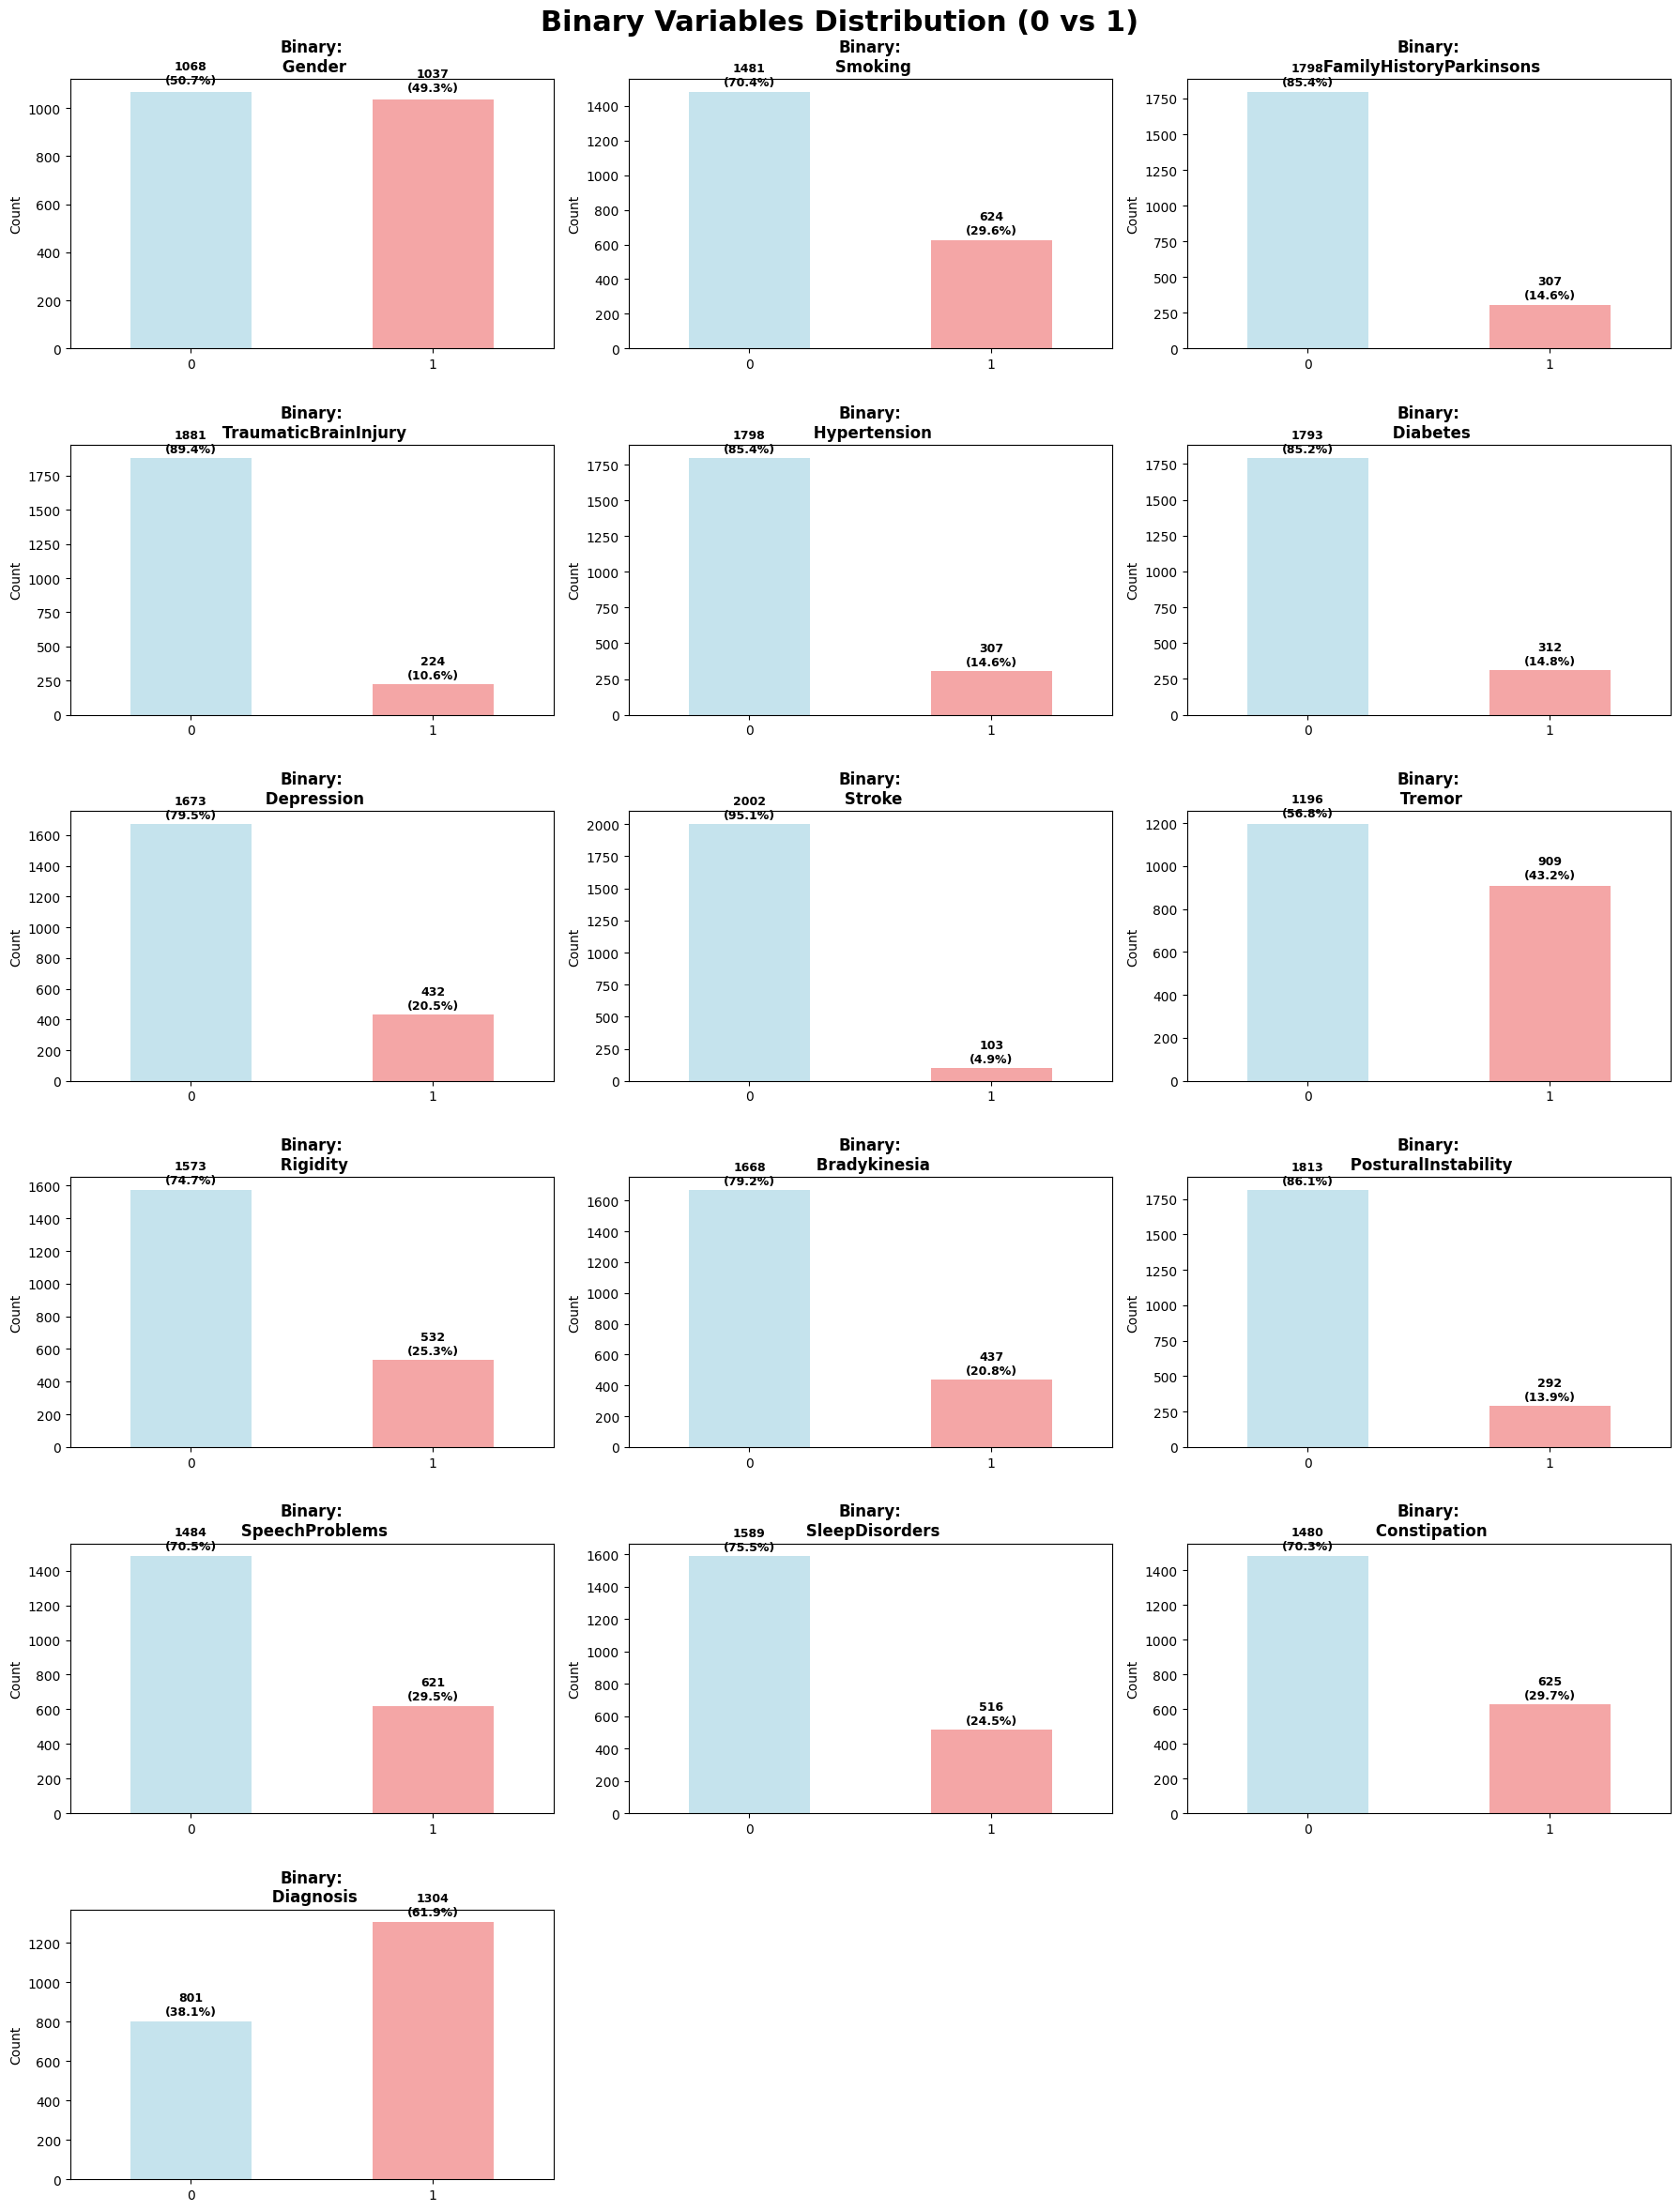

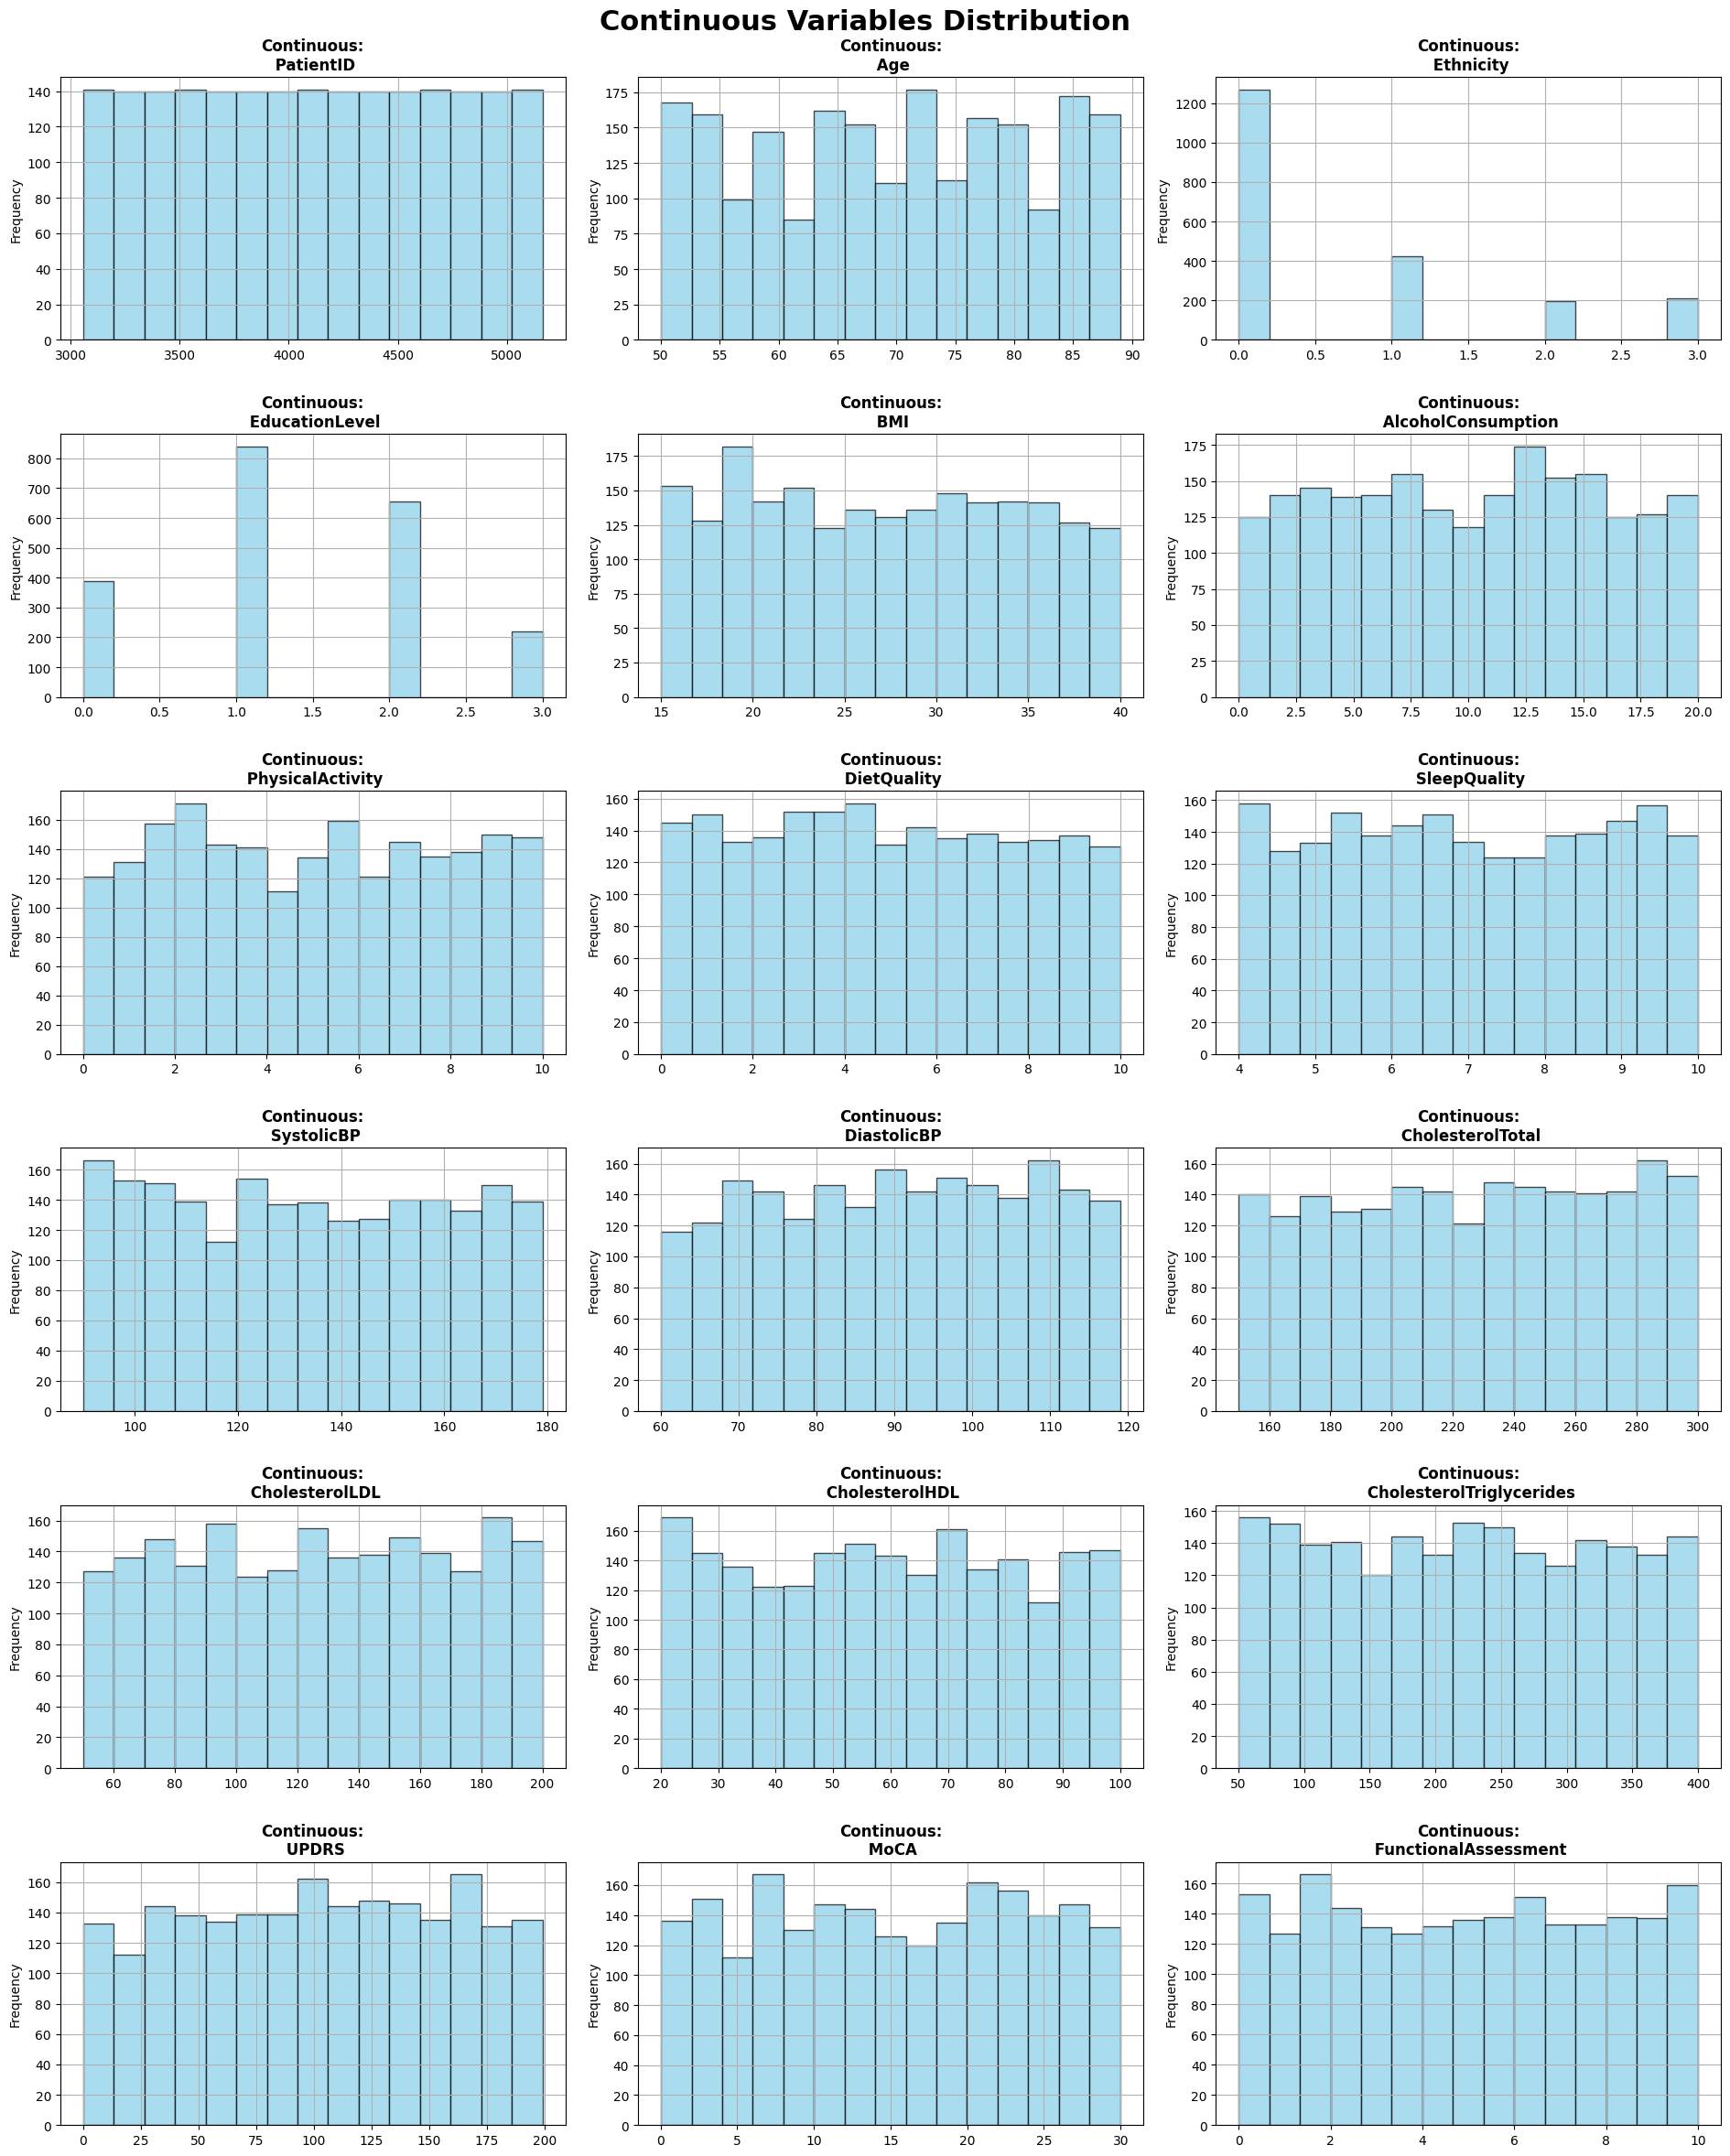

In [6]:
# 3. Visualization dataset before cleaning

# **Separate plots for Binary vs Continuous variables**

import math

# Separate binary columns (only 0 and 1) from continuous numerical columns
binary_cols = []
continuous_cols = []

for col in parkinsons_data.select_dtypes(include=[np.number]).columns:
    unique_vals = parkinsons_data[col].dropna().unique()
    if set(unique_vals).issubset({0, 1}):
        binary_cols.append(col)
    else:
        continuous_cols.append(col)

print(f"Binary columns ({len(binary_cols)}): {binary_cols}")
print(f"Continuous columns ({len(continuous_cols)}): {continuous_cols}\n")

# Plot BINARY columns - 3 per row
if binary_cols:
    n_cols = 3
    n_rows = math.ceil(len(binary_cols) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else axes

    for i, col in enumerate(binary_cols):
        # Get value counts and calculate percentages
        value_counts = parkinsons_data[col].value_counts().reindex([0, 1], fill_value=0)
        total = value_counts.sum()
        percentages = (value_counts / total * 100).round(1)

        # Plot the bars
        bars = value_counts.plot(kind='bar', ax=axes[i], color=['lightblue', 'lightcoral'], alpha=0.7)
        axes[i].set_title(f'\nBinary:\n {col}', fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['0', '1'], rotation=0)

        # Add percentage labels on bars
        for j, (count, pct) in enumerate(zip(value_counts, percentages)):
            axes[i].text(j, count + total * 0.01, f'{count}\n({pct}%)',
                        ha='center', va='bottom', fontweight='bold', fontsize=9)

    # Hide empty subplots
    for i in range(len(binary_cols), len(axes)):
        axes[i].set_visible(False)

    plt.suptitle('Binary Variables Distribution (0 vs 1)', fontsize=22, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plot CONTINUOUS columns - 3 per row
if continuous_cols:
    n_cols = 3
    n_rows = math.ceil(len(continuous_cols) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(19, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else axes

    for i, col in enumerate(continuous_cols):
        parkinsons_data[col].hist(ax=axes[i], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'\nContinuous:\n {col}', fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency')

    # Hide empty subplots
    for i in range(len(continuous_cols), len(axes)):
        axes[i].set_visible(False)

    plt.suptitle('Continuous Variables Distribution', fontsize=22, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [7]:
# 4. Data Cleaning and Imputation**

# Display missing values count before cleaning
print("Missing Values Before Cleaning:")
print("=" * 40)
missing_before = parkinsons_data.isnull().sum()
print(missing_before[missing_before > 0])

# Drop 'DoctorInCharge' column (non-numerical and not useful for analysis)
if 'DoctorInCharge' in parkinsons_data.columns:
    parkinsons_data = parkinsons_data.drop('DoctorInCharge', axis=1)
    print(f"\n✅ Dropped 'DoctorInCharge' column (non-numerical feature)")
else:
    print(f"\n❌ 'DoctorInCharge' column not found in dataset")

# Handle missing values - fill numerical columns with median
numerical_cols = parkinsons_data.select_dtypes(include=[np.number]).columns
parkinsons_data[numerical_cols] = parkinsons_data[numerical_cols].fillna(parkinsons_data[numerical_cols].median())

# For categorical columns (if any), fill with mode
categorical_cols = parkinsons_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if parkinsons_data[col].isnull().sum() > 0:
        parkinsons_data[col] = parkinsons_data[col].fillna(parkinsons_data[col].mode()[0])

# Display missing values count after cleaning
print("\nMissing Values After Cleaning:")
print("=" * 40)
missing_after = parkinsons_data.isnull().sum()
print(missing_after[missing_after > 0])

print(f"\n✅ Data cleaning completed!")
print(f"Final dataset shape: {parkinsons_data.shape}")
print(f"Columns after cleaning: {list(parkinsons_data.columns)}")

Missing Values Before Cleaning:
Series([], dtype: int64)

✅ Dropped 'DoctorInCharge' column (non-numerical feature)

Missing Values After Cleaning:
Series([], dtype: int64)

✅ Data cleaning completed!
Final dataset shape: (2105, 34)
Columns after cleaning: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']


# **Step 3: Model Implementation and Evaluation**

In [8]:
# 5.Data Scaling (Simplified)

# Target Column
target_column = 'Diagnosis'

# Separate features and target
X = parkinsons_data.drop(target_column, axis=1)
y = parkinsons_data[target_column]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Scale numerical features only
numerical_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

# Create final DataFrame with scaled numerical features and original non-numerical features
X_final = X.copy()
X_final[numerical_cols] = X_scaled

print("\nScaled Features (first 5 rows):")
print(X_final.head())

print("\nVerification - Mean ~0 and Std ~1 for scaled features:")
print(X_final[numerical_cols].describe())

Features shape: (2105, 33)
Target shape: (2105,)
Target distribution:
Diagnosis
1    1304
0     801
Name: count, dtype: int64

Scaled Features (first 5 rows):
   PatientID       Age    Gender  Ethnicity  EducationLevel       BMI  \
0  -1.731228  1.328366 -0.985380   2.299112       -0.376599 -1.053179   
1  -1.729583  0.465684 -0.985380  -0.690160        0.739937 -1.521172   
2  -1.727937  0.034343  1.014837  -0.690160       -1.493134 -1.643161   
3  -1.726291 -1.518484 -0.985380  -0.690160       -1.493134 -1.631183   
4  -1.724646  1.500903 -0.985380  -0.690160       -0.376599 -1.192477   

    Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  ...     UPDRS  \
0 -0.649105           -0.867475         -1.258035    -0.354851  ... -1.678331   
1  1.540583           -0.705769          1.173999     1.253913  ... -1.133101   
2 -0.649105           -1.371569         -1.661943     0.552304  ... -0.593466   
3 -0.649105           -0.711021         -1.259978     0.627607  ... -0.856351 

In [9]:
# 6. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, stratify=y, random_state=42
)  # stratify ensures there is no bias in the split

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

# Check the distribution in train and test sets
print("\nTarget distribution in Training set:")
print(y_train.value_counts(normalize=True))

Training samples: 1684
Testing samples: 421
Training features shape: (1684, 33)
Testing features shape: (421, 33)

Target distribution in Training set:
Diagnosis
1    0.619359
0    0.380641
Name: proportion, dtype: float64


#**Step4: Model Interpretation and Inference**

In [10]:
# 7 Model Creation & Comparison: KNN vs Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

print("MODEL COMPARISON - Parkinson's Diagnosis Prediction")
print("=" * 60)

# Initialize both models
knn = KNeighborsClassifier(n_neighbors=11)
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train KNN model
print("\n1. K-Nearest Neighbors Model")
print("-" * 40)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

# Calculate KNN metrics
knn_train_accuracy = knn.score(X_train, y_train)
knn_test_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

print(f"Training Accuracy: {knn_train_accuracy:.4f} ({knn_train_accuracy*100:.2f}%)")
print(f"Test Accuracy:     {knn_test_accuracy:.4f} ({knn_test_accuracy*100:.2f}%)")
print(f"Precision:         {knn_precision:.4f}")
print(f"Recall:            {knn_recall:.4f}")
print(f"F1-Score:          {knn_f1:.4f}")

# Train Logistic Regression model
print("\n2. Logistic Regression Model")
print("-" * 40)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Calculate Logistic Regression metrics
lr_train_accuracy = log_reg.score(X_train, y_train)
lr_test_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print(f"Training Accuracy: {lr_train_accuracy:.4f} ({lr_train_accuracy*100:.2f}%)")
print(f"Test Accuracy:     {lr_test_accuracy:.4f} ({lr_test_accuracy*100:.2f}%)")
print(f"Precision:         {lr_precision:.4f}")
print(f"Recall:            {lr_recall:.4f}")
print(f"F1-Score:          {lr_f1:.4f}")

# Comparative Analysis
print("\n" + "=" * 60)
print("COMPARATIVE ANALYSIS")
print("=" * 60)

# Create comparison table
comparison_data = {
    'Metric': ['Training Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'K-Nearest Neighbors': [knn_train_accuracy, knn_test_accuracy, knn_precision, knn_recall, knn_f1],
    'Logistic Regression': [lr_train_accuracy, lr_test_accuracy, lr_precision, lr_recall, lr_f1]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nPerformance Comparison:")
print(comparison_df.round(4))

# Determine best model based on F1-Score (balanced metric)
if knn_f1 > lr_f1:
    best_model = knn
    best_model_name = "K-Nearest Neighbors"
    best_predictions = y_pred_knn
    best_probabilities = y_pred_proba_knn
    best_accuracy = knn_test_accuracy
    best_f1 = knn_f1
else:
    best_model = log_reg
    best_model_name = "Logistic Regression"
    best_predictions = y_pred_lr
    best_probabilities = y_pred_proba_lr
    best_accuracy = lr_test_accuracy
    best_f1 = lr_f1

print(f"\n🎯 BEST MODEL: {best_model_name}")
print(f"   Test Accuracy: {best_accuracy:.4f}")
print(f"   F1-Score: {best_f1:.4f}")

# Overfitting analysis
print("\n" + "=" * 60)
print("OVERFITTING ANALYSIS")
print("=" * 60)

knn_gap = knn_train_accuracy - knn_test_accuracy
lr_gap = lr_train_accuracy - lr_test_accuracy

print(f"KNN Accuracy Gap (Train - Test): {knn_gap:.4f}")
print(f"LR Accuracy Gap (Train - Test): {lr_gap:.4f}")

if knn_gap > 0.1:
    print("⚠️  KNN shows potential overfitting")
else:
    print("✅ KNN generalization looks good")

if lr_gap > 0.1:
    print("⚠️  Logistic Regression shows potential overfitting")
else:
    print("✅ Logistic Regression generalization looks good")

# Store results for later steps
print("\n" + "=" * 60)
print("MODELS TRAINED SUCCESSFULLY!")
print("=" * 60)

MODEL COMPARISON - Parkinson's Diagnosis Prediction

1. K-Nearest Neighbors Model
----------------------------------------
Training Accuracy: 0.8135 (81.35%)
Test Accuracy:     0.7482 (74.82%)
Precision:         0.7609
Recall:            0.8659
F1-Score:          0.8100

2. Logistic Regression Model
----------------------------------------
Training Accuracy: 0.8319 (83.19%)
Test Accuracy:     0.8005 (80.05%)
Precision:         0.8266
Recall:            0.8582
F1-Score:          0.8421

COMPARATIVE ANALYSIS

Performance Comparison:
              Metric  K-Nearest Neighbors  Logistic Regression
0  Training Accuracy               0.8135               0.8319
1      Test Accuracy               0.7482               0.8005
2          Precision               0.7609               0.8266
3             Recall               0.8659               0.8582
4           F1-Score               0.8100               0.8421

🎯 BEST MODEL: Logistic Regression
   Test Accuracy: 0.8005
   F1-Score: 0.8421

OVER

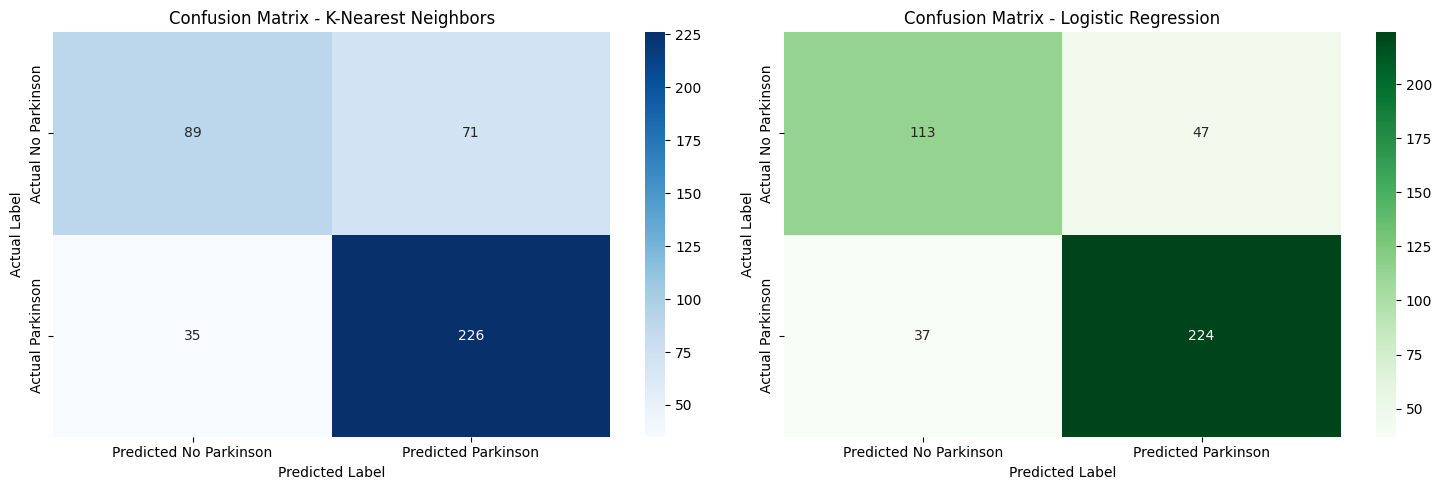

CONFUSION MATRIX ANALYSIS

K-Nearest Neighbors:
True Negatives:   89 | False Positives:  71
False Negatives:  35 | True Positives:  226
Sensitivity (Recall):    0.8659
Specificity:             0.5563
Precision:               0.7609

Logistic Regression:
True Negatives:  113 | False Positives:  47
False Negatives:  37 | True Positives:  224
Sensitivity (Recall):    0.8582
Specificity:             0.7063
Precision:               0.8266


In [11]:
# 8. Confusion Matrices - Model Comparison

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

# KNN Confusion Matrix
plt.subplot(1, 2, 1)
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Parkinson', 'Predicted Parkinson'],
            yticklabels=['Actual No Parkinson', 'Actual Parkinson'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - K-Nearest Neighbors')

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 2)
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted No Parkinson', 'Predicted Parkinson'],
            yticklabels=['Actual No Parkinson', 'Actual Parkinson'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Logistic Regression')

plt.tight_layout()
plt.show()

# Detailed confusion matrix analysis
print("CONFUSION MATRIX ANALYSIS")
print("=" * 50)

def analyze_confusion_matrix(cm, model_name):
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    print(f"\n{model_name}:")
    print(f"True Negatives:  {tn:3d} | False Positives: {fp:3d}")
    print(f"False Negatives: {fn:3d} | True Positives:  {tp:3d}")
    print(f"Sensitivity (Recall):    {recall:.4f}")
    print(f"Specificity:             {specificity:.4f}")
    print(f"Precision:               {precision:.4f}")

analyze_confusion_matrix(cm_knn, "K-Nearest Neighbors")
analyze_confusion_matrix(cm_lr, "Logistic Regression")

In [12]:
# 9. Classification Reports - Model Comparison

print("CLASSIFICATION REPORTS")
print("=" * 60)

print("\nK-Nearest Neighbors Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred_knn,
                          target_names=['No Parkinson', 'Parkinson']))

print("\nLogistic Regression Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred_lr,
                          target_names=['No Parkinson', 'Parkinson']))

print("\n" + "=" * 60)
print("BEST MODEL DETAILED REPORT")
print("=" * 60)
print(f"Best Model: {best_model_name}")
print("=" * 30)

if best_model_name == "K-Nearest Neighbors":
    best_report = classification_report(y_test, y_pred_knn,
                                      target_names=['No Parkinson', 'Parkinson'])
else:
    best_report = classification_report(y_test, y_pred_lr,
                                      target_names=['No Parkinson', 'Parkinson'])
print(best_report)

# Medical diagnosis perspective
print("\nMEDICAL DIAGNOSIS INTERPRETATION")
print("=" * 50)
print("For Parkinson's Disease Prediction:")
print("• High RECALL is important: We want to detect as many actual Parkinson's cases as possible")
print("• High PRECISION is important: We want to avoid false alarms")
print("• F1-Score balances both recall and precision")
print(f"• Best model ({best_model_name}) achieves F1-Score: {best_f1:.4f}")

CLASSIFICATION REPORTS

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

No Parkinson       0.72      0.56      0.63       160
   Parkinson       0.76      0.87      0.81       261

    accuracy                           0.75       421
   macro avg       0.74      0.71      0.72       421
weighted avg       0.74      0.75      0.74       421


Logistic Regression Classification Report:
              precision    recall  f1-score   support

No Parkinson       0.75      0.71      0.73       160
   Parkinson       0.83      0.86      0.84       261

    accuracy                           0.80       421
   macro avg       0.79      0.78      0.79       421
weighted avg       0.80      0.80      0.80       421


BEST MODEL DETAILED REPORT
Best Model: Logistic Regression
              precision    recall  f1-score   support

No Parkinson       0.75      0.71      0.73       160
   Parkinson       0.83      0.86      0.84       261

    accurac

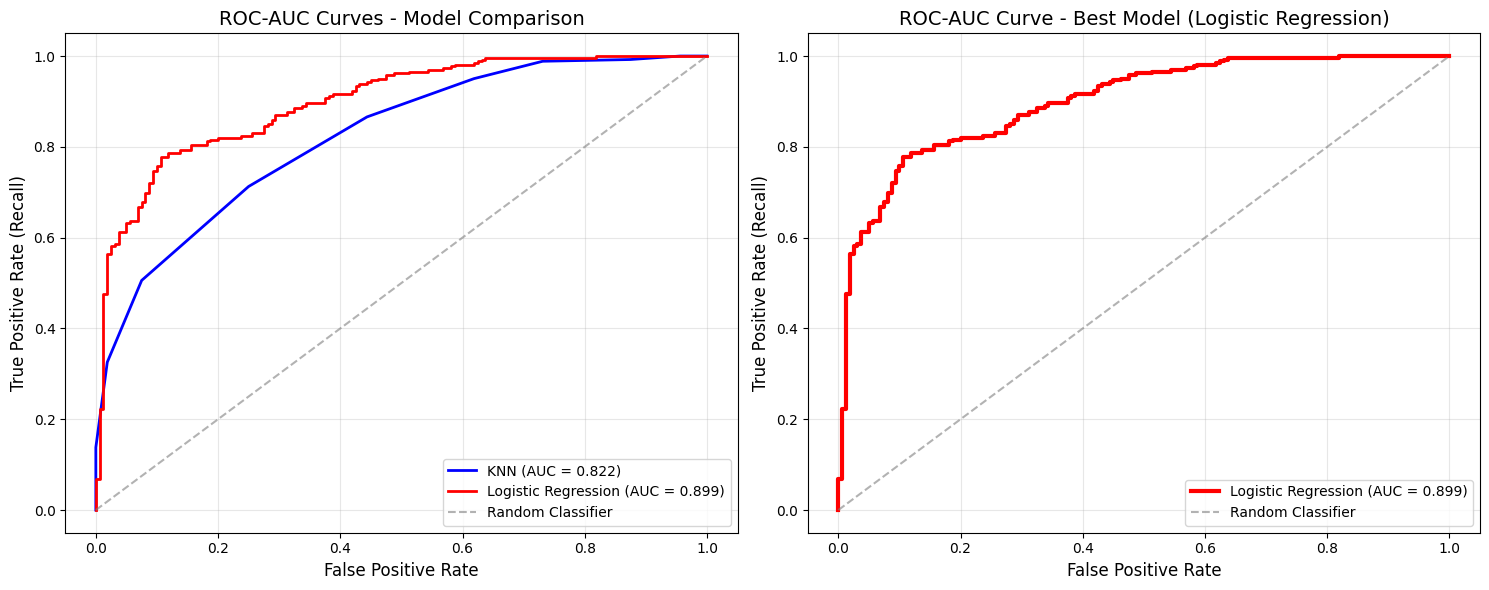

ROC-AUC INTERPRETATION
K-Nearest Neighbors AUC: 0.8223
Logistic Regression AUC: 0.8989
Best Model (Logistic Regression) AUC: 0.8989

AUC Score Guidelines:
0.90 - 1.00: Excellent discrimination
0.80 - 0.90: Good discrimination
0.70 - 0.80: Fair discrimination
0.60 - 0.70: Poor discrimination
0.50 - 0.60: No discrimination

Optimal Threshold for Logistic Regression: 0.686
At this threshold:
- True Positive Rate: 0.778
- False Positive Rate: 0.106


In [13]:
# 10. ROC-AUC Curves - Model Comparison

from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(15, 6))

# Subplot 1: Both models comparison
plt.subplot(1, 2, 1)
# KNN ROC Curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

# Logistic Regression ROC Curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})', color='blue', linewidth=2)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', color='red', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.6, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC-AUC Curves - Model Comparison', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Subplot 2: Best model detailed view
plt.subplot(1, 2, 2)
if best_model_name == "K-Nearest Neighbors":
    fpr_best, tpr_best, thresholds_best = fpr_knn, tpr_knn, thresholds_knn
    auc_best = auc_knn
    color = 'blue'
else:
    fpr_best, tpr_best, thresholds_best = fpr_lr, tpr_lr, thresholds_lr
    auc_best = auc_lr
    color = 'red'

plt.plot(fpr_best, tpr_best, color=color, linewidth=3, label=f'{best_model_name} (AUC = {auc_best:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.6, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title(f'ROC-AUC Curve - Best Model ({best_model_name})', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# AUC Interpretation
print("ROC-AUC INTERPRETATION")
print("=" * 50)
print(f"K-Nearest Neighbors AUC: {auc_knn:.4f}")
print(f"Logistic Regression AUC: {auc_lr:.4f}")
print(f"Best Model ({best_model_name}) AUC: {auc_best:.4f}")

print("\nAUC Score Guidelines:")
print("0.90 - 1.00: Excellent discrimination")
print("0.80 - 0.90: Good discrimination")
print("0.70 - 0.80: Fair discrimination")
print("0.60 - 0.70: Poor discrimination")
print("0.50 - 0.60: No discrimination")

# Find optimal threshold (Youden's J statistic)
youden_j = tpr_best - fpr_best
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds_best[optimal_idx]

print(f"\nOptimal Threshold for {best_model_name}: {optimal_threshold:.3f}")
print(f"At this threshold:")
print(f"- True Positive Rate: {tpr_best[optimal_idx]:.3f}")
print(f"- False Positive Rate: {fpr_best[optimal_idx]:.3f}")


In [14]:
# 11. Model Prediction on New Patient Data

print("PATIENT PREDICTION EXAMPLE")
print("=" * 50)

# First, let's see ALL the features that were used in training
print("Features used during model training:")
print("-" * 40)
print(X_train.columns.tolist())
print(f"\nTotal features: {len(X_train.columns)}")

# Create new patient data with ALL features exactly as they were during training
new_patient = {}

# Add PatientID (this was missing from our previous attempt)
new_patient['PatientID'] = [9999]  # Using a test ID

# Add all the other features we had before
new_patient.update({
    'Age': [72],
    'Gender': [1],  # 1 = Female, 0 = Male
    'Ethnicity': [2],
    'EducationLevel': [3],
    'BMI': [24.8],
    'Smoking': [0],  # 0 = No, 1 = Yes
    'AlcoholConsumption': [2.5],
    'PhysicalActivity': [2.8],
    'DietQuality': [4.2],
    'SleepQuality': [7.5],
    'FamilyHistoryParkinsons': [1],  # 1 = Yes, 0 = No
    'TraumaticBrainInjury': [0],
    'Hypertension': [1],
    'Diabetes': [0],
    'Depression': [0],
    'Stroke': [0],
    'SystolicBP': [138],
    'DiastolicBP': [82],
    'CholesterolTotal': [215],
    'CholesterolLDL': [135],
    'CholesterolHDL': [45],
    'CholesterolTriglycerides': [180],
    'UPDRS': [28.5],  # Unified Parkinson's Disease Rating Scale - higher indicates more severe symptoms
    'MoCA': [26],  # Montreal Cognitive Assessment - lower indicates cognitive impairment
    'FunctionalAssessment': [2.8],
    'Tremor': [2],  # Symptom severity 0-4
    'Rigidity': [1],  # Symptom severity 0-4
    'Bradykinesia': [2],  # Symptom severity 0-4
    'PosturalInstability': [1],  # Symptom severity 0-4
    'SpeechProblems': [0],  # 0 = No, 1 = Yes
    'SleepDisorders': [1],  # 0 = No, 1 = Yes
    'Constipation': [1]  # 0 = No, 1 = Yes
})

# Ensure we have ALL features in the exact same order as training
# For any missing features, use median values from training
for column in X_train.columns:
    if column not in new_patient:
        if pd.api.types.is_numeric_dtype(X_train[column]):
            median_val = X_train[column].median()
            new_patient[column] = [median_val]
            print(f"⚠️  Added missing feature: {column} = {median_val}")
        else:
            new_patient[column] = [0]  # Default for other features
            print(f"⚠️  Added missing feature: {column} = 0")

# Convert to DataFrame and ensure same column order as training data
new_df = pd.DataFrame(new_patient)
new_df = new_df[X_train.columns]  # Ensure exact same column order

print(f"\n✅ Using {len(new_df.columns)} features in correct order")

print("\nNew Patient Features for Prediction:")
print("-" * 45)

# Display key clinical features (excluding PatientID for readability)
key_features = ['Age', 'Gender', 'BMI', 'UPDRS', 'MoCA', 'Tremor', 'Rigidity', 'Bradykinesia',
                'FamilyHistoryParkinsons', 'Hypertension', 'SleepDisorders']

for feature in key_features:
    if feature in new_patient:
        value = new_patient[feature][0]
        if feature == 'Gender':
            display_value = 'Female' if value == 1 else 'Male'
        elif feature in ['Smoking', 'FamilyHistoryParkinsons', 'Hypertension', 'SleepDisorders']:
            display_value = 'Yes' if value == 1 else 'No'
        elif feature == 'UPDRS':
            display_value = f"{value} (Moderate)" if value > 20 else f"{value} (Mild)"
        elif feature == 'MoCA':
            display_value = f"{value} (Normal)" if value >= 26 else f"{value} (Impaired)"
        else:
            display_value = value
        print(f"{feature:.<25}: {display_value}")

# Scale the features using the same scaler from training
numerical_cols = new_df.select_dtypes(include=[np.number]).columns
new_df_scaled = new_df.copy()
new_df_scaled[numerical_cols] = scaler.transform(new_df[numerical_cols])

# Make prediction with the best model
final_prediction = best_model.predict(new_df_scaled)[0]
prediction_probability = best_model.predict_proba(new_df_scaled)[0][1]

print(f"\n🔍 PREDICTION RESULTS:")
print("-" * 30)
print(f"Model Used: {best_model_name}")
print(f"Diagnosis: {'Parkinson\'s Disease' if final_prediction == 1 else 'No Parkinson\'s Disease'}")
print(f"Probability: {prediction_probability:.4f} ({prediction_probability*100:.2f}%)")
print(f"Confidence: {'High' if prediction_probability > 0.7 else 'Medium' if prediction_probability > 0.5 else 'Low'}")

PATIENT PREDICTION EXAMPLE
Features used during model training:
----------------------------------------
['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation']

Total features: 33

✅ Using 33 features in correct order

New Patient Features for Prediction:
---------------------------------------------
Age......................: 72
Gender...................: Female
BMI......................: 24.8
UPDRS....................: 28.5 (Moderate)
MoCA.....................: 26 (Normal)
Tremor...................: 2
Rigidity...............

In [15]:
# 12. Save the Models

import joblib

# Save the best model
joblib.dump(best_model, "parkinsons_model.pkl")
joblib.dump(scaler, "parkinsons_scaler.pkl")

print("✅ Models saved successfully!")
print("   - parkinsons_model.pkl (Best model)")
print("   - parkinsons_scaler.pkl (Feature scaler)")

✅ Models saved successfully!
   - parkinsons_model.pkl (Best model)
   - parkinsons_scaler.pkl (Feature scaler)
